In [1]:
from sklearn import datasets

In [2]:
import numpy as np

In [14]:
iris=datasets.load_iris() #carico il dataset
X=iris.data[:,[2,3]]
y=iris.target

In [7]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) 
#il 30% dei dati è usato per test, il 70% per training

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler() #calcola media e deviazione ed effettua la standardizzazione

In [11]:
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
X_train_std=sc.transform(X_train)

In [16]:
X_test_std=sc.transform(X_test)

In [17]:
from matplotlib.colors import ListedColormap

In [18]:
import matplotlib.pyplot as plt

In [29]:
def plot_decision_regions (X, y, classifier, test_idx=None, resolution=0.02):
    #definizione marker e mappa dei colori
    markers= ('s', 'x', 'o', '^', 'v')
    colors= ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #disegno delle superfici decisionali
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict (np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')
        

In [30]:
from sklearn.svm import SVC

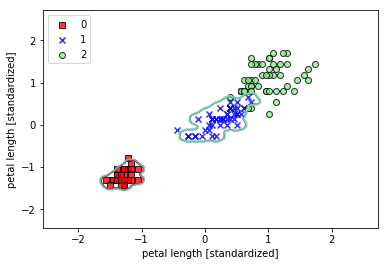

In [31]:
#Macchina a vettori di supporto con kernel Radial basis function
svm= SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train) #addestramento del modello
X_combined_std = np.vstack((X_train_std, X_test_std)) #concatena gli array verticalmente e orizzontalmente
y_combined= np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

In [32]:
from sklearn.linear_model import LogisticRegression

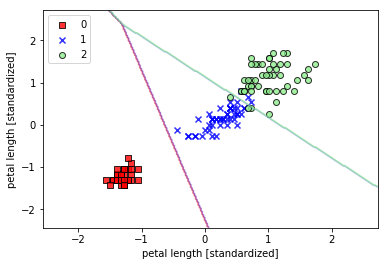

In [34]:
#Logistic Regression
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

In [37]:
from sklearn.tree import DecisionTreeClassifier

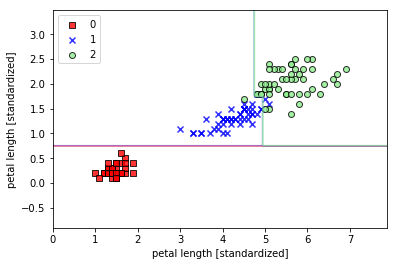

In [40]:
#Albero decisionale
tree= DecisionTreeClassifier (criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)
X_combined_std= np.vstack((X_train, X_test))
y_combined= np.hstack((y_train, y_test));
plot_decision_regions(X_combined_std, y_combined, classifier=tree, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()